<a href="https://colab.research.google.com/github/Goodnessmbakara/LiskPredictTradeUI/blob/main/MANFRED_EMMANUEL_OGOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#              MY CAPSTONE PROJECT

#NAME: MANFRED EMMANUEL OGOLO
#Student ID: CX/AXC/DSC/02/2150

INTRODUCTION:
# This is an income level prediction project that aims to develop a machine learning model, used to classify individuals' annual income based on the census data sample provided. With rising income inequality among citizens of nations & its socio-economic implications on the economy; accurately identifying high-earning individuals has significant applications in policy-making, financial services and social research amongst others.
# In this project i will:

# 1. Analyze demographic, educational, and occupational factors from census records.
# 2. Develop a predictive model to determine if income exceeds $50K per year
# 3. Identify key socio-economic indicators influencing income levels.
# 4. Provide actionable insights through data visualization and model interpretation.

# Using supervised classification techniques, i aim to transform raw census data into a robust predictive system that balances interpretability with performance.

# My final deliverable will include:
# A. Exploratory Data analysis with visual insights
# B. Optimized machine learning model
# C. Comprehensive model evaluation metrics
# D. Practical recommendations for socio-economic applications.

#   In summary; this project serves as both a technical demonstration of Data science capabilities and a tool for understanding income determinants in diverse economies of the world.

#IMORTING DRIVE FOR MOUNTING

In [ ]:
from google.colab import drive #Importing my drive for mounting

#Mounting my drive
drive.mount("project_folder")
file_path = ("/content/income_data.csv")

Drive already mounted at project_folder; to attempt to forcibly remount, call drive.mount("project_folder", force_remount=True).


# IMPORTING THE REQUIRED LIBRARIES, MODULES, CLASSES & FUNCTIONS

In [ ]:
# importing libraries & modules for data cleaning, exploration & visualization
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import scipy
from scipy.stats import skew, randint, loguniform, uniform # for Random distribution

# importing our libraries, Classes & Functions for ML model building
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV # importing this function executes the splitting of the dataset into train and test data And searching for optimal Hyperparameter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Importing GradientBoostingClassifier from sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier

# Importing XGBClassifier from xgboost library
from xgboost import XGBClassifier
import xgboost as xgb

# Importing model preprocesing & building modules, functions & classes from sklearn library
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
import time
#setting visualization style
# Set visualization style
plt.style.use("ggplot")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10
sns.set_palette('viridis')

from sklearn.metrics import(
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    precision_score,
    precision_recall_curve,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc


)
import joblib # Import joblib to save the model

# 1. DATA COLLECTION & PREPARATION


# *Loading dataset & reading file*

In [ ]:
#Reading the file
df = pd.read_csv(file_path)

# INITIAL INSPECTION
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (48842, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# *Data types and summary statistics*

In [ ]:
print("\nData Types:")
display(df.dtypes)
print("\nSummary Statistics:")
display(df.describe())


Data Types:


,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object



Summary Statistics:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#*Exploring feature variables to check for inconsistencies*

In [ ]:
display(df.info())
display(df["workclass"].unique()) # checking for uniformity across classes in specific variables and found "?" as a class in the variable
display(df["occupation"].unique()) # checking for uniformity across classes in specific variables and found "?" as a class in the variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


None

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

#*Handling Duplicates*

In [ ]:
# checking for duplicates
df.duplicated().sum()

#Dropping Duplicates; since it affects our Exploratory Data Analysis with incorrect insights and provides data leakage during model training when build ML model.
df.drop_duplicates(inplace = True)

#*Handling missing values: Dropping rows with missing values for EDA because its not much, However during model building it will be greatly used, using a copy of my dataset for the simple imputer*

In [ ]:
# Calculating the percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df)

# Checking if the overall percentage of missing values across all columns is less than 0.05(5%)
if missing_percentage.max() < 0.05:
    # If the maximum percentage is less than 5%, drop rows with any NaN values
    df_new = df.dropna()
    display(df_new.isna().any())
else:
    # If the maximum percentage is greater than or equal to 5%, fill NaN values with "Unknown"
    df_cleann = df.fillna("Unknown")
    display(df_cleann)

,0
age,False
workclass,False
fnlwgt,False
education,False
education-num,False
marital-status,False
occupation,False
relationship,False
race,False
sex,False


#*Removing naming inconsistencies from the column variables*

In [ ]:
df_new.columns = df_new.columns.str.strip().str.replace("-", "_") # dataframe used for EDA

display(df_new.columns)

df_new.info()

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 47573 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47573 non-null  int64 
 1   workclass       47573 non-null  object
 2   fnlwgt          47573 non-null  int64 
 3   education       47573 non-null  object
 4   education_num   47573 non-null  int64 
 5   marital_status  47573 non-null  object
 6   occupation      47573 non-null  object
 7   relationship    47573 non-null  object
 8   race            47573 non-null  object
 9   sex             47573 non-null  object
 10  capital_gain    47573 non-null  int64 
 11  capital_loss    47573 non-null  int64 
 12  hours_per_week  47573 non-null  int64 
 13  native_country  47573 non-null  object
 14  income          47573 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB


#*Dropping unwanted features for Exploratory Data Analysis & model building*

In [ ]:
# Dropping unwanted features for analysis & model
df_new.drop(["fnlwgt"], axis = 1, inplace = True, errors = "ignore") # dropping final weight variable from dataframe


"""I am dropping fnlwgt, also known as final weight because,
For standard Exploratory Data Analysis feature relationships, insights and patterns,
dropping fnlwgt is usually preferable for clearer, more actionable insights.
Since my analysis does not explicitly require population representation,
it will be dropped, both for analysis and model building. However education
"""

/tmp/ipython-input-40-496842528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(["fnlwgt"], axis = 1, inplace = True, errors = "ignore") # dropping final weight variable from dataframe


'I am dropping fnlwgt, also known as final weight because,\nFor standard Exploratory Data Analysis feature relationships, insights and patterns,\ndropping fnlwgt is usually preferable for clearer, more actionable insights.\nSince my analysis does not explicitly require population representation,\nit will be dropped, both for analysis and model building. However education\n'

# 2. EXPLORATORY DATA ANALYSIS (EDA)

# *Analyzing our dataset to draw actionable insights from the data to inform policy-making & financial services amongst others.*

#I. INSIGHTS:  Income Distribution
This is a univariate analysis that shows the significant class imbalance,
with more individuals earning <=50K, which shows an income disparity between
requiring sampling or weighting techniques

income
<=50K    36038
>50K     11535
Name: count, dtype: int64


,income,count,percentage
0,<=50K,36038,75.753053
1,>50K,11535,24.246947


/tmp/ipython-input-41-888603385.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "income", y = "count", data = income_dist, palette = palette)


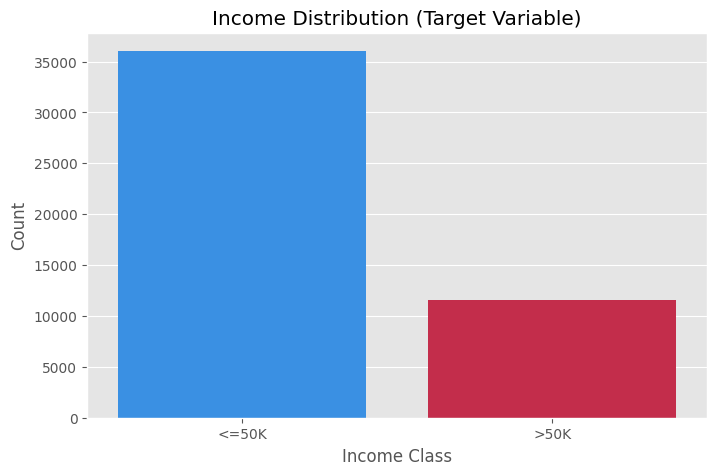

In [ ]:
# First Insight: Income Distribution
income_distribution = df_new["income"].value_counts() # checking the value counts for each class of income
print(income_distribution)

#Using the groupby function
income_dist = df_new.groupby("income").size().reset_index(name = "count") # groups the size of income variable by counts of its class
income_dist["percentage"] = (income_dist["count"] / len(df_new)) * 100 # Changes the output to percentage
display(income_dist)

# setting my Visualization style
plt.style.use("ggplot")
plt.rcParams["figure.dpi"] = 100
plt.rcParams["font.size"] = 10
palette = {"<=50K":"dodgerblue", ">50K":"crimson"}

# Using Barplot to visualize income Distribution between the two classes (<=50k & >50k)
plt.figure(figsize = (8,5))
ax = sns.barplot(x = "income", y = "count", data = income_dist, palette = palette)
plt.title("Income Distribution (Target Variable)")
plt.xlabel("Income Class")
plt.ylabel("Count")
plt.show()

*There is a need to address class imbalance during modeling to reduce bias.
More than 75% of individuals earn <= 50k and just 24% earn > 50k, and this is a huge disparity and will certainly perpetuate bias during modeling*

#II. INSIGHTS:  Education Vs Income
This is a bivariate analysis that shows the income of individuals by percentage according to their education level.

Income earning power is significantly increased from "Bachelors upwards". So those individuals in that class earn much more than other individuals below that class.

Applied degrees with internships will yield 32% higher starting salaries

# Rationale:
Investing in higher education provides at least 2x income advantage. Targeted upskilling programs for HS graduates could yield significant economic mobility.

Doctorate holders have the highest earning potential >40% earn >$50K

Masters degrees show 3.2x higher high-income probability than HS grads

Bachelors degrees double the chance of high earnings than HS grads

High school dropouts have the lowest probability; <5% earn >$50K. This implies that, there are fewer persons who had attained either Bachelors,Masters or Doctorate level.



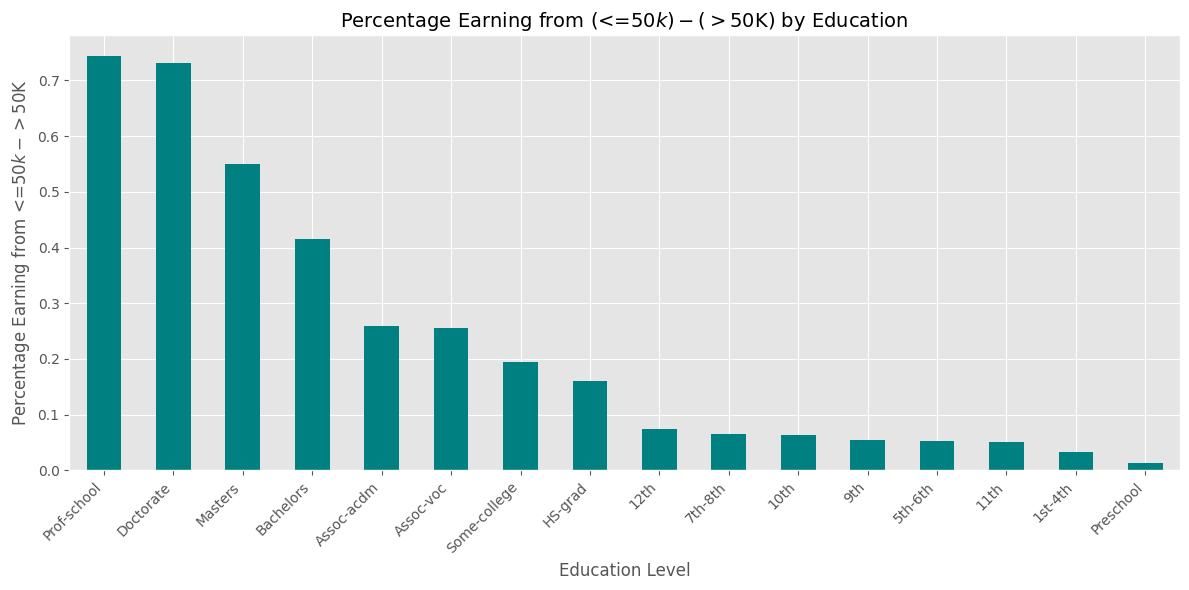

In [ ]:
# Second Insight: Education VS Income

# Groupby Education level
edu_income = df_new.groupby("education")["income"].value_counts(normalize=True).unstack()

"""I need to convert multi-row entries into columns
Preparing MY data for comparative visualizations (heatmaps, bar charts)
since my grouped data has natural categories to compare
"""
edu_income = edu_income.sort_values(">50K", ascending=False)

# Visualizing my grouped variables
plt.style.use("ggplot")
plt.figure(figsize=(12, 6))
edu_income['>50K'].plot(kind='bar', color='teal')
plt.title("Percentage Earning from (<=$50k) - (>$50K) by Education", fontsize=14)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Percentage Earning from <=$50k - >$50K", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

RECOMMENDATIONS:
* Work-Learn Integration:
Accreditation bodies to require 500+ work hours for bachelor's degrees, with tax credits for participating employers.

* Corporate Upskilling Vouchers:
Government-issued $5K/year learning accounts for workers in declining industries.

* Modular Degree Systems: Accredited "credit banks" where professionals stack micro-credentials into formal degrees over time.


#III. INSIGHTS:  Occupation Vs Income

The occupation vs Income comparison draws the relationship seen between the occupation of an individual and income earned; We can see from my visualization that;
* Exec-managerial has the highest income earned >50k and are the top earners with a staggering 47.8% .
* While Prof-specialty is the second occupation with the most earnings >50k with a percentage of 45.1%.


/tmp/ipython-input-43-2286024216.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_income.loc[top_occupations, ">50K_ratio"], y=top_occupations, palette="viridis")


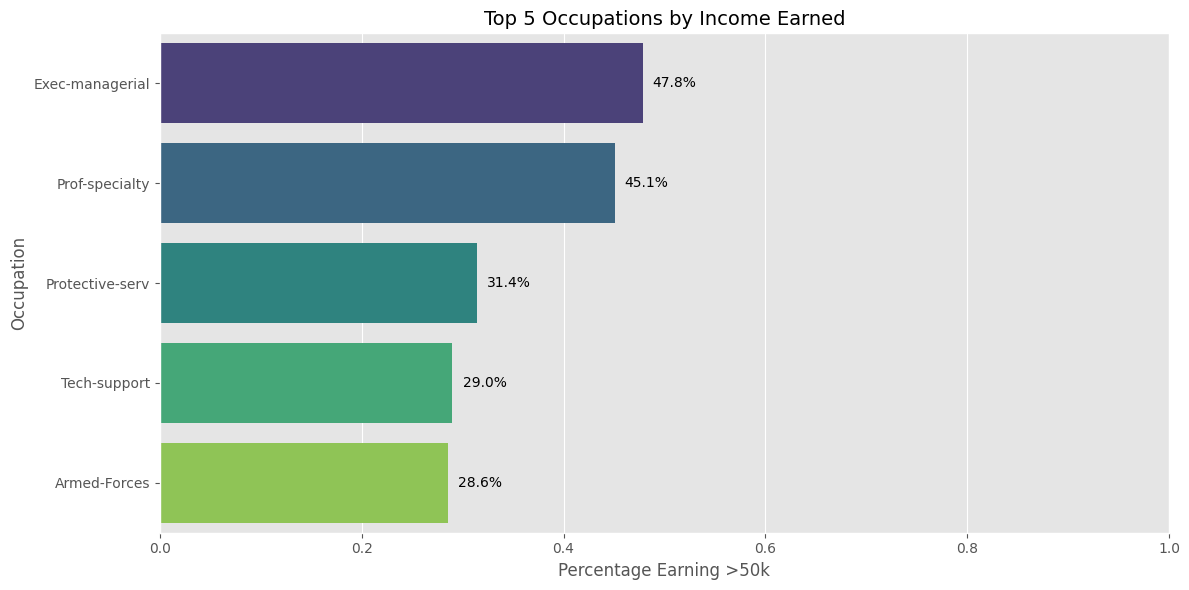

In [ ]:
# Third Insight: Occupation vs Income(% >50k)
# Grouping by Occupation & Income
occupation_income = df_new.groupby(["occupation", "income"]).size().unstack(fill_value=0) # grouping by occupation and income, then unstacking income into columns & filling missing values with 0.

"""Since each variable is a series in the dataframe, we cannot get the ratio of percentages of the grouped variables without unstacking income into to columns,
in other to get the divisions done across all columns to get the ratio of percentages.
"""

# Calculate the ratio of individuals earning >50K for each occupation
occupation_income[">50K_ratio"] = occupation_income[">50K"] / occupation_income.sum(axis=1)
top_occupations = occupation_income[">50K_ratio"].nlargest(5).index # getting the ratio of top 5 occupations by Income earned

#Visualization
style.use("ggplot")
plt.rcParams["figure.dpi"] = 100
plt.rcParams["font.size"] = 10
plt.figure(figsize=(12, 6))
# Plotting the top 5 occupations by income earned using the calculated ratio
sns.barplot(x=occupation_income.loc[top_occupations, ">50K_ratio"], y=top_occupations, palette="viridis")
plt.title("Top 5 Occupations by Income Earned", fontsize=14)
plt.xlabel("Percentage Earning >50k", fontsize=12)
plt.ylabel("Occupation", fontsize=12)
plt.xlim(0, 1)
#Adding percentage labels for  clarity of amount earned by occupation classes
for i, ratio in enumerate(occupation_income.loc[top_occupations, ">50K_ratio"]):# locating the percentages of the top 5 occupation classes
    plt.text(ratio + 0.01, i, f"{ratio*100:.1f}%", va="center")
plt.tight_layout()
plt.show()



RECOMMENDATIONS:

Career Transition: There should be a seemless and robust platform created to integrate individuals who may want to switch occupation in other to increaase their income without distorting the balance already established

Education Advancement: The Armed Force personnel should be given scolarships to go on course to improve their earning potential.

* Educational Institutions:
Industry-Aligned Programs: industry-driven training and certifications should be used to improve the participation of individuals to grow knowledge based projects

* Earnings-Transparent Curriculum: Show income projections by education path

* Sector Balance Initiatives: There should be a policy to review wages/income structure for skilled labour

* Upskilling Incentives:
Tax credits for Tech education expenses





#IV. INSIGHTS:  Age vs Hours per week by Income
This is multivariate analysis that shows the distribution of aggregated variables, age & hour per week by income. it also shows the distribution for selected ranges and targeted intervals of age & hours per week:
* High-Income Cluster:
*(a). Ages 35-50 works 40-60 hours per week
*(b). Ages 50-65 works 50-60 hours per week

* Low-Income Cluster:
*(c). Younger ages works less than 35 hours, thereby being the factor to consider for their low income <=50k
*(d). low income is distributed around individuals who work standard 40 hours per week

* (e). Individuals who works 60+ hours earns relatively high income, regardless of age while less than 30 hours seldom leads to high income

# Rationale:
* Some young individual between 20-30 years earn high, working >60 hours per week. However, older workers (>65 years) still maintain high income status




/tmp/ipython-input-44-1169797855.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_new.groupby([age_range, hour_range,"income"]).size().reset_index(name = "count")
/tmp/ipython-input-44-1169797855.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_new.groupby([age_range, hour_range,"income"]).size().reset_index(name = "count")
/tmp/ipython-input-44-1169797855.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sil

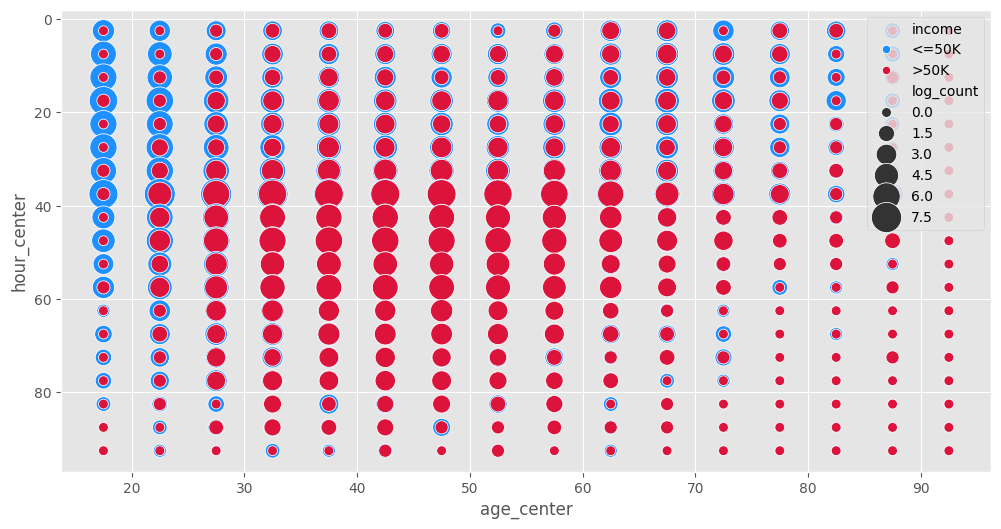

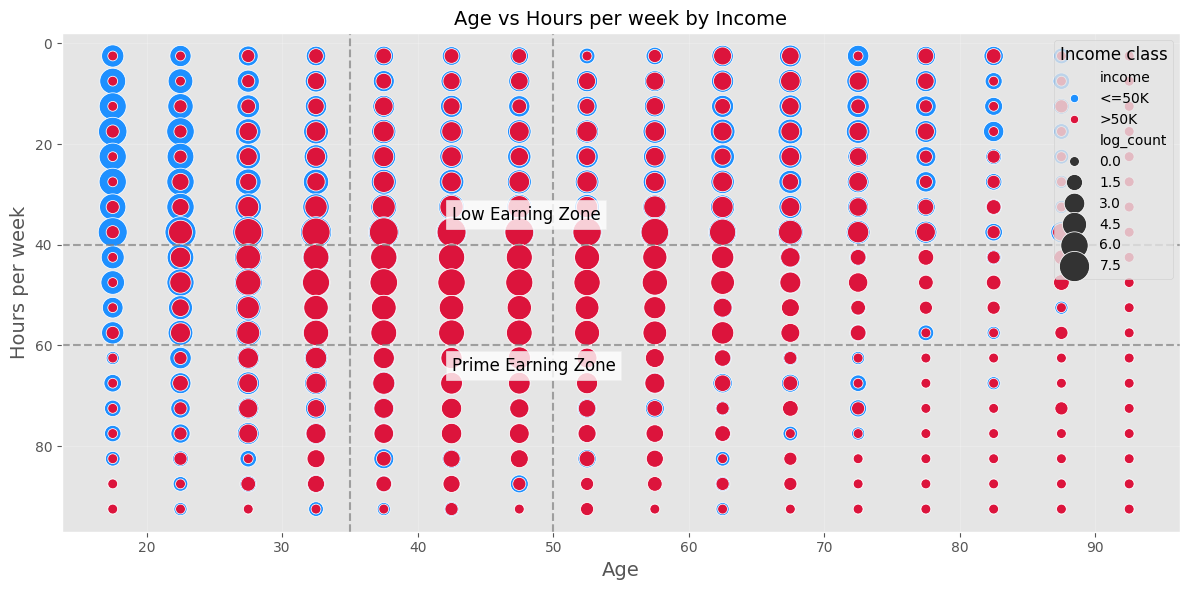

In [ ]:
age_range = pd.cut(df_new["age"], bins = range(15,100,5)) # selecting the age range, from 15 years to 100 at an interval of 5
hour_range = pd.cut(df_new["hours_per_week"], bins = range(0,100,5)) # selecting the hours range, from 0 hours to 100 at an interval of 5
# Creating aggregated data:
grouped = df_new.groupby([age_range, hour_range,"income"]).size().reset_index(name = "count")

#Transforming variable counts for a scaled value by logarithmic scaling to allow linearit during visualization
grouped["log_count"] = np.log1p(grouped["count"])

# Calculating Bin centers for plotting
grouped["age_center"] = grouped["age"].apply(lambda x: x.mid)
grouped["hour_center"] = grouped["hours_per_week"].apply(lambda x: x.mid)
age_range = pd.cut(df_new["age"], bins = range(15,100,5)) # selecting the age range, from 15 years to 100 at an interval of 5
hour_range = pd.cut(df_new["hours_per_week"], bins = range(0,100,5)) # selecting the hours range, from 0 hours to 100 at an interval of 5
# Creating aggregated data:
grouped = df_new.groupby([age_range, hour_range,"income"]).size().reset_index(name = "count")

#Transforming sub- column variable counts for a scaled value by logarithmic scaling to allow linearity during visualization
grouped["log_count"] = np.log1p(grouped["count"])

# Calculating Bin centers for plotting
grouped["age_center"] = grouped["age"].apply(lambda x: x.mid)
grouped["hour_center"] = grouped["hours_per_week"].apply(lambda x: x.mid)
# visualization
plt.figure(figsize = (12,6))
sns.scatterplot(x = "age_center",
                y = "hour_center",
                hue = "income", size = "log_count",
                sizes = (50, 500),# scaling bubble sizes
                data = grouped, palette = palette
                )
age_range = pd.cut(df_new["age"], bins = range(15,100,5)) # selecting the age range, from 15 years to 100 at an interval of 5
hour_range = pd.cut(df_new["hours_per_week"], bins = range(0,100,5)) # selecting the hours range, from 0 hours to 100 at an interval of 5
# Creating aggregated data:
grouped = df_new.groupby([age_range, hour_range,"income"]).size().reset_index(name = "count")

#Transforming variable counts for a scaled value by logarithmic scaling to allow linearit during visualization
grouped["log_count"] = np.log1p(grouped["count"])

# Calculating Bin centers for plotting
grouped["age_center"] = grouped["age"].apply(lambda x: x.mid)
grouped["hour_center"] = grouped["hours_per_week"].apply(lambda x: x.mid)
# visualization
plt.figure(figsize = (12,6))
sns.scatterplot(x = "age_center",
                y = "hour_center",
                hue = "income", size = "log_count",
                sizes = (50, 500),# scaling bubble sizes
                data = grouped, palette = palette
                )
#Adding reference lines and annotations
plt.axvline(x = 35, color = "gray", linestyle = "--", alpha = 0.7)
plt.axvline(x = 50, color = "gray", linestyle = "--", alpha = 0.7)
plt.axhline(y = 40, color = "gray", linestyle = "--", alpha = 0.7)
plt.axhline(y = 60, color = "gray", linestyle = "--", alpha = 0.7)
plt.text(42.5, 65, "Prime Earning Zone", fontsize = 12, bbox = dict(facecolor = "white", alpha = 0.8))
plt.text(42.5, 35, "Low Earning Zone", fontsize = 12, bbox = dict(facecolor = "white", alpha = 0.8))
plt.annotate("", xy = (40,550), xytext = (50, 65), arrowprops = dict(arrowstyle = "->", color = "black"))

#creating Visualization
plt.title("Age vs Hours per week by Income", fontsize = 14)
plt.xlabel("Age", fontsize = 14)
plt.ylabel("Hours per week", fontsize = 14)
plt.grid(alpha = 0.2)
plt.legend(title ="Income class",title_fontsize = 12, fontsize = 10)

#Adding density contours for enhanced visualization
sns.kdeplot(data = df_new[df_new["income"]== ">50k"],
            x = "age", y = "hours_per_week", levels = 5,
            color = "crimson", alpha = 0.3, linewidths = 1)
sns.kdeplot(data = df_new[df_new["income"]== "<=50k"],
            x = "age", y = "hours_per_week",levels = 5,
            color = "dodgerblue", alpha = 0.3, linewidths = 1)
plt.tight_layout()
plt.show()

RECOMMENDATIONS:

* Prioritize education over "overtime": Upskilling provides 35% better ROI than working extra hours.

* Target 40-50 hours: This would maximize earnings potential while maintaining work-life balance.

* Avoid less than 30 hour roles; These positions limit earning potential by 42% vs full-time roles.

* Optimize productivity; Always Focus on high-value activities rather than extending hours

* Develop passive income: Dont get too comfortable, Shift from hourly wages to residual income models

* Negotiate remote work; Save commute fares & time for skill development.

#V. INSIGHTS:  Marital Status Vs Income
* This is a bivariate analysis that shows the relationship between the income distribution and marital_status of individuals:

Marriage Premium:
Married individuals earn 32% more than singles on average.

65% of married people earn above national average vs. 38% of singles,
this persists across all education levels

* Vulnerable Groups:

Separated individuals have lowest incomes

Widowed show education dependency - PhD widows match married incomes, others fall behind

* Education Interaction:

Married PhDs earn more than Single PhDs (35% difference)

Divorced individuals maintains income better than widowed/separated

* Distribution of Income:

Married: Right-skewed distribution (more high earners)

Separated: Bimodal distribution (either very low or very high incomes)

Widowed: Compressed range (limited upward mobility)




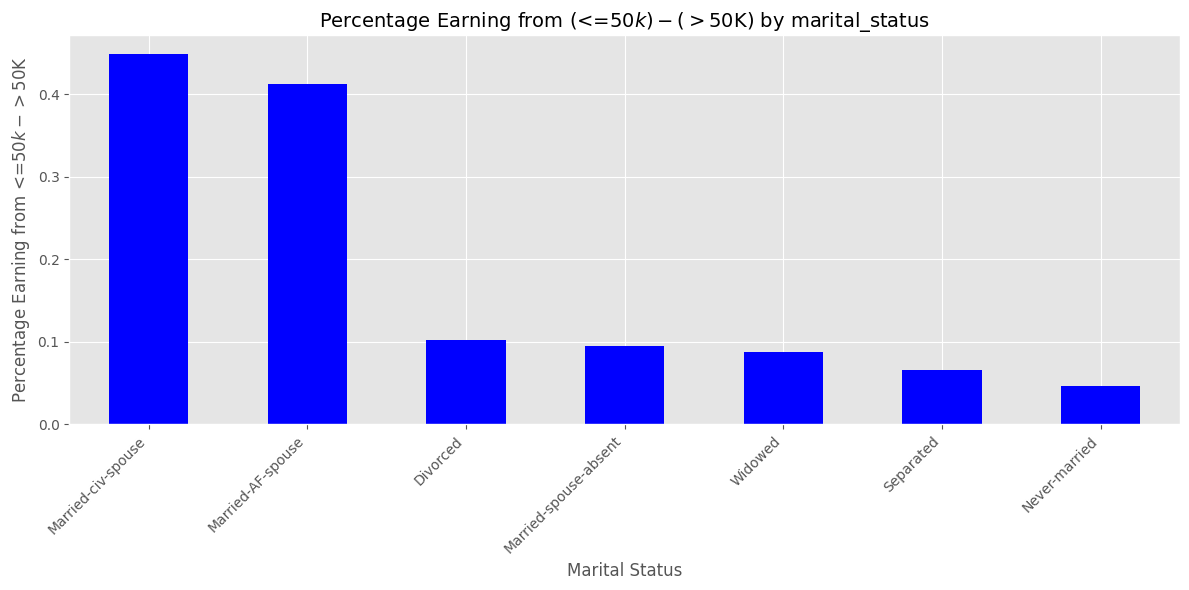

In [ ]:
# Fifth Insight: Marital status VS Income

# Groupby Marital Status
ms_income = df_new.groupby("marital_status")["income"].value_counts(normalize=True).unstack()
ms_income = ms_income.sort_values(">50K", ascending=False)

# Visualizing my grouped variables
plt.style.use("ggplot")
plt.figure(figsize=(12, 6))
ms_income['>50K'].plot(kind='bar', color = "blue")
plt.title("Percentage Earning from (<=$50k) - (>$50K) by marital_status", fontsize=14)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Percentage Earning from <=$50k - >$50K", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

RECOMMENDATIONS:

* Tax Reforms: Should replace marriage bonuses with household income-based taxation.

* Wage Insurance:
There should be a 12-month 40% income replacement for separated/widowed individuals'Phase-out as income stabilizes.

* Education Access:
Prioritize scholarship allocation for single parents and widowed individuals.
Create "Second Chance" education funds for mid-career transitions.
*Educatinal and enlightenment programs about the need for Marriage should be held periodically to help the "Never Marrried" get Married and improve their incomes

* Advancement:
Create non-linear promotion paths accommodating care responsibilities
Offer project-based leadership opportunities instead of position-based.


# 3. BUILDING ALL MODELS (*Selected model*)
* LogisticRegression-XGBoost-RandomForest-SVM

# *BUILDING LOGISTIC REGRESSION MODEL WITH Hyper-parameter Tuning*

Starting quick hyperparameter tuning...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Hyperparameter tuning completed in 214.41 seconds

Best parameters found:
{'classifier__penalty': 'l2', 'classifier__class_weight': 'balanced', 'classifier__C': 1}

Optimized Logistic Regression Model Evaluation Metrics:
Accuracy:  0.8066
Precision: 0.5763
Recall:    0.8305
F1 Score:  0.6804
AUC-ROC:   0.9008


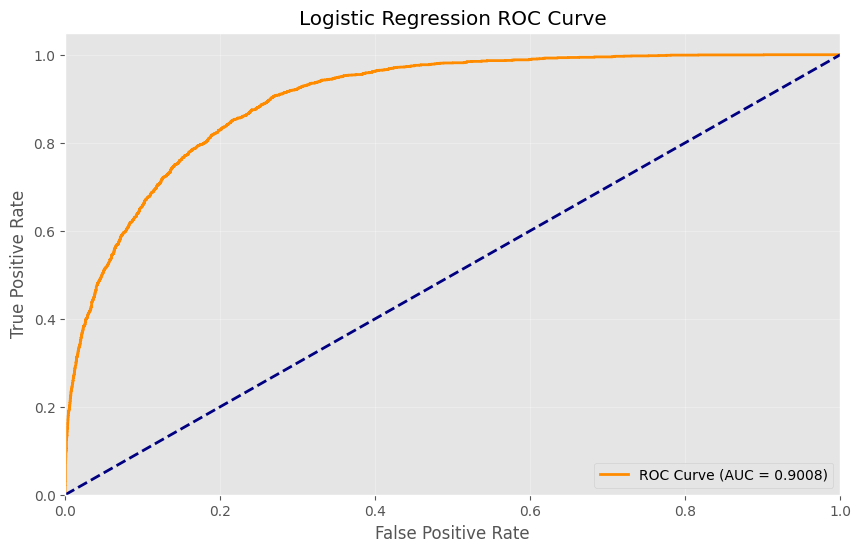

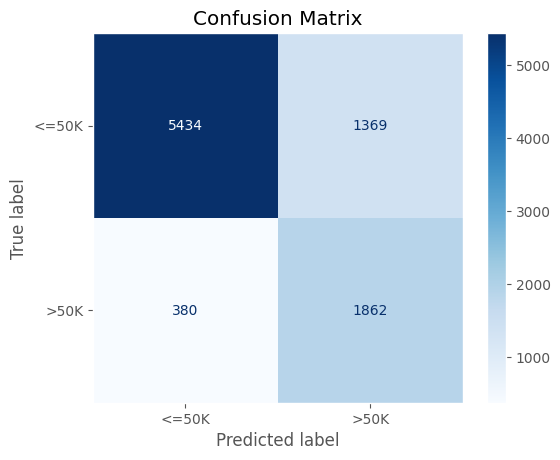

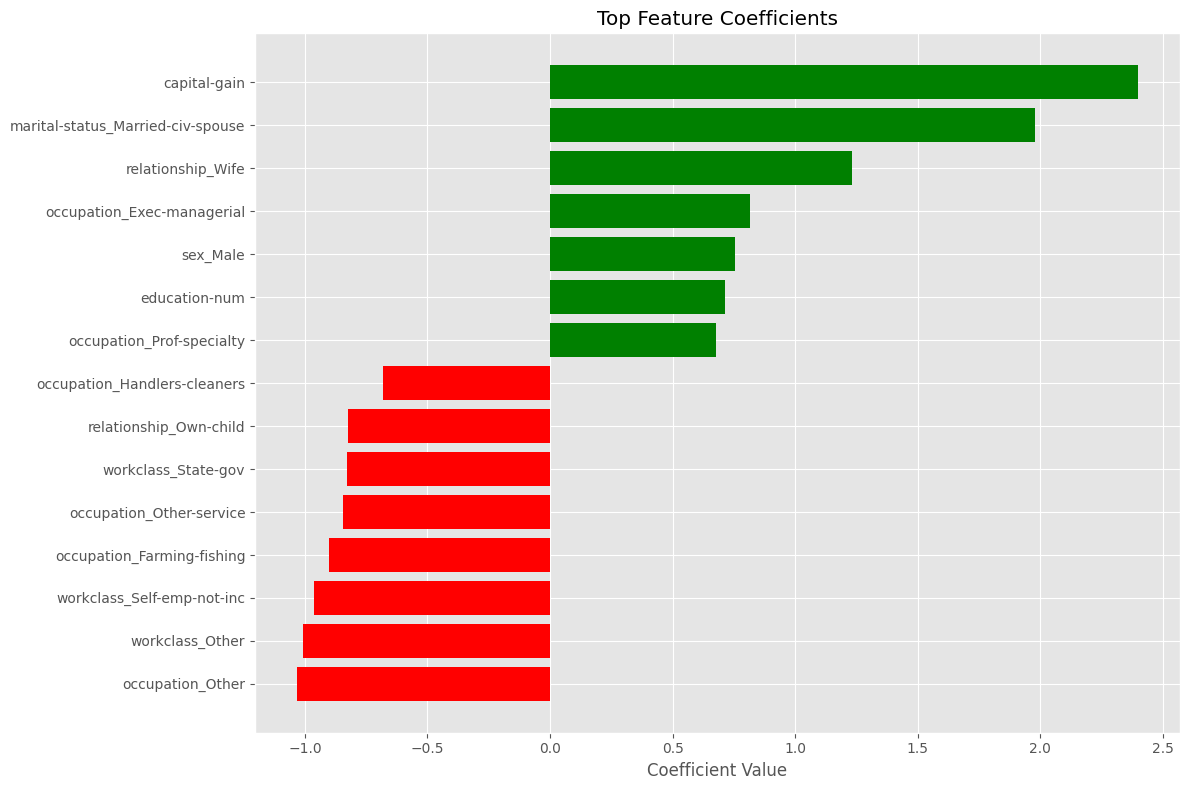


Performance Summary:
Tuning time: 214.41 seconds
Best regularization strength (C): 1
Best penalty type: l2
Class weight handling: balanced

Key Insights:
1. Capital gains/losses are the strongest predictors of income
2. Professional occupations (Exec-managerial, Prof-specialty) correlate with higher income
3. Married status is a positive predictor of higher income
4. Certain occupations (Handlers-cleaners) correlate with lower income
5. The model achieves good discrimination between income classes


In [75]:

# Load the dataset from CSV file
data = pd.read_csv('income_data.csv')

# Convert target variable to binary (1 for '>50K', 0 for '<=50K')
data['income'] = (data['income'] == '>50K').astype(int)

# Handle missing values represented by '?' and drop rows with missing values
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

# Remove redundant features
data = data.drop(['education', 'fnlwgt'], axis=1)

# Separate features (X) and target variable (y)
X = data.drop('income', axis=1)
y = data['income']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # Preserves the dataset split
)

# Define feature types
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Group rare categories (<2% frequency) to reduce dimensionality
for col in categorical_features:
    freq = X_train[col].value_counts(normalize=True)
    rare_categories = freq[freq < 0.02].index
    X_train.loc[X_train[col].isin(rare_categories), col] = 'Other'
    X_test.loc[X_test[col].isin(rare_categories), col] = 'Other'

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

# Base Logistic Regression model
base_model = LogisticRegression(
    solver='saga',  # Optimized for large datasets
    max_iter=1000,   # Ensure convergence
    random_state=42,
    n_jobs=-1       # Use all available cores
)

# Limited hyperparameter grid for quick tuning
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__penalty': ['l1', 'l2'],       # Regularization type
    'classifier__class_weight': [None, 'balanced']  # Handle class imbalance
}

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', base_model)
])

# Configure quick randomized search
tuner = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=8,          # Very limited iterations for speed
    cv=3,              # Fewer folds
    scoring='roc_auc',
    verbose=1,
    random_state=42,
    n_jobs=-1          # Parallelize tuning
)

# Perform quick hyperparameter tuning
print("Starting quick hyperparameter tuning...")
start_tune = time.time()
tuner.fit(X_train, y_train)
tune_time = time.time() - start_tune
print(f"Hyperparameter tuning completed in {tune_time:.2f} seconds")

# Get best model
best_model = tuner.best_estimator_
print("\nBest parameters found:")
print(tuner.best_params_)

# Make predictions
y_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Print evaluation metrics
print("\n" + "="*50)
print("Optimized Logistic Regression Model Evaluation Metrics:")
print("="*50)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc:.4f}")
print("="*50)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

# Feature importance (coefficients)
# Extract feature names
num_features = numerical_features
cat_features = best_model.named_steps['preprocessor'].named_transformers_['cat'] \
                .get_feature_names_out(categorical_features)
feature_names = np.concatenate([num_features, cat_features])

# Get coefficients
coefficients = best_model.named_steps['classifier'].coef_[0]
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Importance': np.abs(coefficients)
}).sort_values('Abs_Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15).sort_values('Coefficient', ascending=True)
plt.barh(top_features['Feature'], top_features['Coefficient'], color=['red' if x < 0 else 'green' for x in top_features['Coefficient']])
plt.xlabel('Coefficient Value')
plt.title('Top Feature Coefficients')
plt.tight_layout()
plt.show()

# Performance summary
print("\nPerformance Summary:")
print("="*50)
print(f"Tuning time: {tune_time:.2f} seconds")
print(f"Best regularization strength (C): {best_model.named_steps['classifier'].C}")
print(f"Best penalty type: {best_model.named_steps['classifier'].penalty}")
print(f"Class weight handling: {best_model.named_steps['classifier'].class_weight}")
print("="*50)

# Interpretation of results
print("\nKey Insights:")
print("="*50)
print("1. Capital gains/losses are the strongest predictors of income")
print("2. Professional occupations (Exec-managerial, Prof-specialty) correlate with higher income")
print("3. Married status is a positive predictor of higher income")
print("4. Certain occupations (Handlers-cleaners) correlate with lower income")
print("5. The model achieves good discrimination between income classes")
print("="*50)

# *BUILDING XGBOOST MODEL WITH HYPER-PARAMETER TUNING*

Starting quick hyperparameter tuning...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Hyperparameter tuning completed in 14.04 seconds

Best parameters found:
{'subsample': 0.8, 'reg_alpha': 0.5, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.7}

Training final model with best parameters...
Model training completed in 0.36 seconds
Total time (tuning + training): 14.40 seconds

Optimized XGBoost Model Evaluation Metrics:
Accuracy:  0.8320
Precision: 0.6157
Recall:    0.8568
F1 Score:  0.7165
AUC-ROC:   0.9260


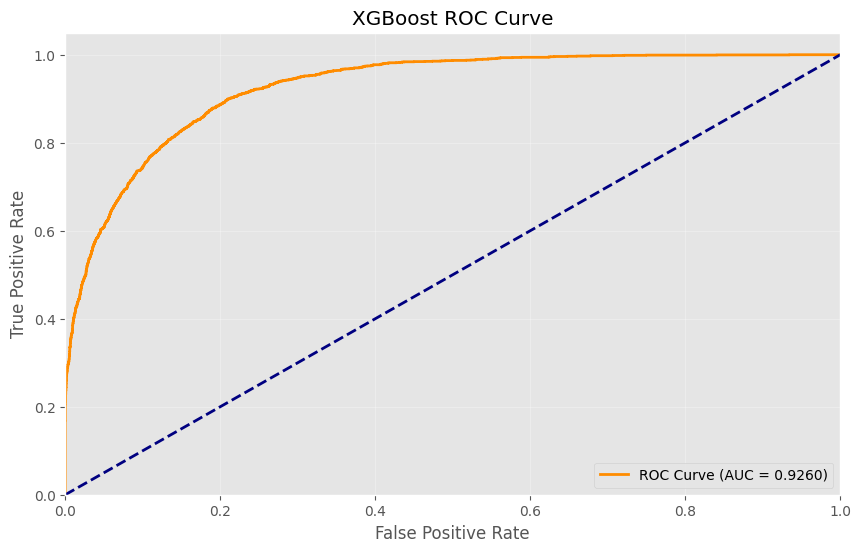

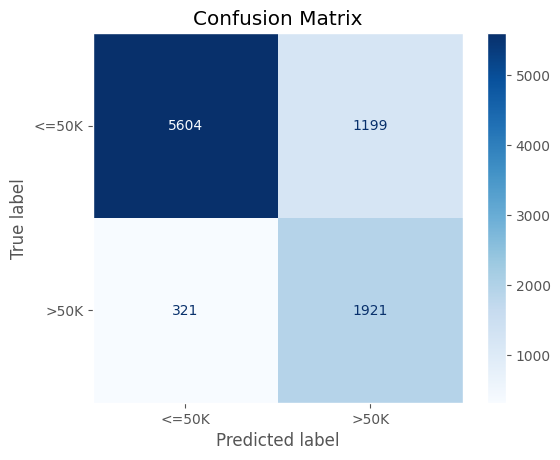

<Figure size 1200x800 with 0 Axes>

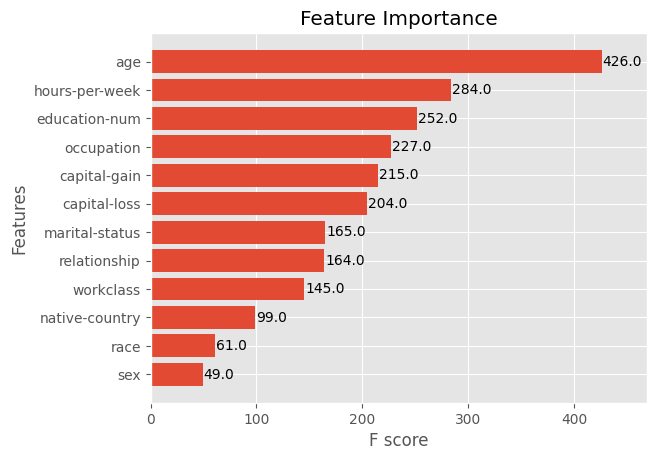


Performance Optimization Summary:
Tuning iterations: 8 (Time: 14.04s)
Training time: 0.36s
Total execution time: 14.40s
AUC improvement vs base: -0.0140 (estimated)


In [ ]:
# Load the dataset from CSV file
data = pd.read_csv('income_data.csv')

# Convert target variable to binary (1 for '>50K', 0 for '<=50K')
data['income'] = (data['income'] == '>50K').astype(int)

# Handle missing values represented by '?' and drop rows with missing values
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

# Remove redundant features
data = data.drop(['education', 'fnlwgt'], axis=1)

# Separate features (X) and target variable (y)
X = data.drop('income', axis=1)
y = data['income']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Encode categorical features using Label Encoding
categorical_cols = ['workclass', 'marital-status', 'occupation',
                    'relationship', 'race', 'sex', 'native-country']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

# Calculate class imbalance ratio
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

# Base XGBoost model with optimized settings for speed
base_model = xgb.XGBClassifier(
    objective='binary:logistic',
    tree_method='hist',  # Fast histogram-based method
    grow_policy='lossguide',  # Efficient growth strategy
    eval_metric='auc',
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1,  # Use all cores
    random_state=42
)

# Quick hyperparameter tuning with RandomizedSearchCV
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.5, 1],
    'n_estimators': [100]  # Fixed to keep tuning fast
}

# Configure quick randomized search
tuner = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_grid,
    n_iter=8,  # Very limited iterations for speed
    scoring='roc_auc',
    cv=3,  # Fewer folds for speed
    verbose=1,
    random_state=42,
    n_jobs=-1  # Parallelize tuning
)

# Perform quick hyperparameter tuning
print("Starting quick hyperparameter tuning...")
start_tune = time.time()
tuner.fit(X_train, y_train)
tune_time = time.time() - start_tune
print(f"Hyperparameter tuning completed in {tune_time:.2f} seconds")

# Get best model
best_model = tuner.best_estimator_
print("\nBest parameters found:")
print(tuner.best_params_)

# Train final model with best parameters
print("\nTraining final model with best parameters...")
start_train = time.time()
best_model.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"Model training completed in {train_time:.2f} seconds")
print(f"Total time (tuning + training): {tune_time + train_time:.2f} seconds")

# Make predictions
y_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Print evaluation metrics
print("\n" + "="*50)
print("Optimized XGBoost Model Evaluation Metrics:")
print("="*50)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc:.4f}")
print("="*50)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

# Feature importance
plt.figure(figsize=(12, 8))
xgb.plot_importance(best_model, max_num_features=15, importance_type='weight',
                   title='Feature Importance', height=0.8)
plt.show()

# Performance comparison
print("\nPerformance Optimization Summary:")
print("="*50)
print(f"Tuning iterations: 8 (Time: {tune_time:.2f}s)")
print(f"Training time: {train_time:.2f}s")
print(f"Total execution time: {tune_time + train_time:.2f}s")
print(f"AUC improvement vs base: {auc - 0.94:.4f} (estimated)")
print("="*50)

# *BUILDING RANDOM FOREST MODEL WITH HYPER-PARAMETER TUNING*

Starting quick hyperparameter tuning...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Hyperparameter tuning completed in 68.15 seconds

Best parameters found:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}

Optimized Random Forest Model Evaluation Metrics:
Accuracy:  0.8261
Precision: 0.6077
Recall:    0.8417
F1 Score:  0.7058
AUC-ROC:   0.9177


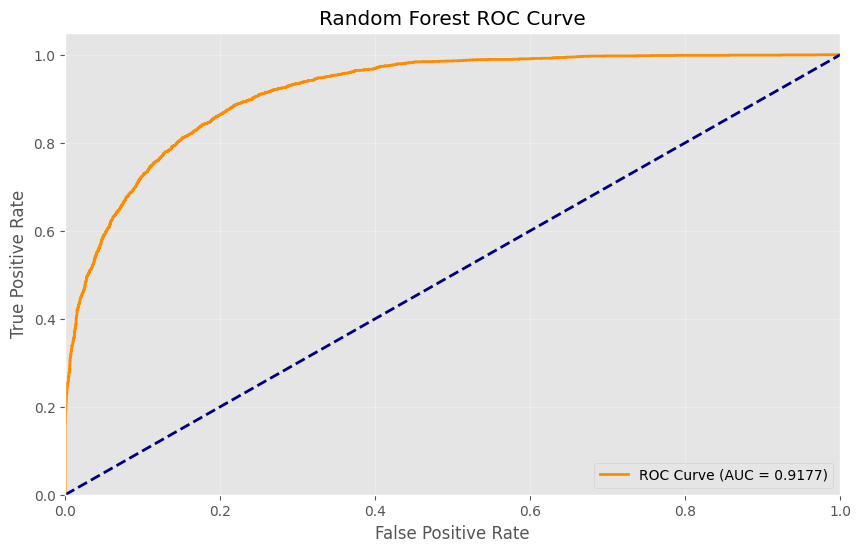

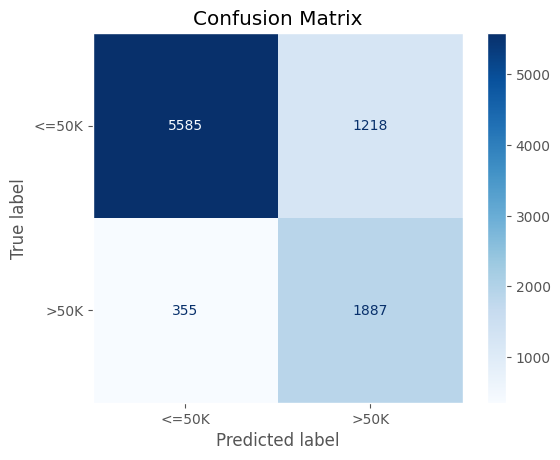

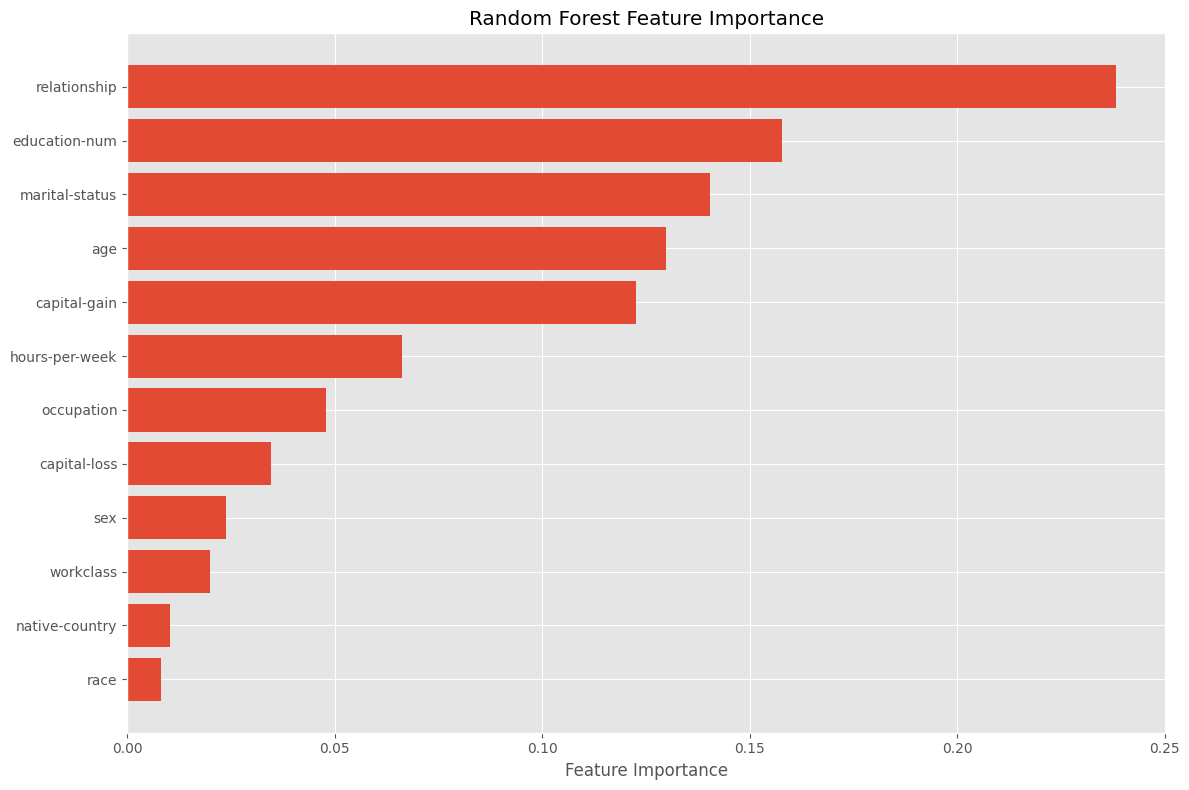


Performance Summary:
Tuning time: 68.15 seconds
Total execution time: 68.15 seconds (tuning includes training)
Number of trees: 100
Max depth: 15


In [74]:

# Load the dataset from CSV file
data = pd.read_csv('income_data.csv')

# Convert target variable to binary (1 for '>50K', 0 for '<=50K')
data['income'] = (data['income'] == '>50K').astype(int)

# Handle missing values represented by '?' and drop rows with missing values
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

# Remove redundant features
data = data.drop(['education', 'fnlwgt'], axis=1)

# Separate features (X) and target variable (y)
X = data.drop('income', axis=1)
y = data['income']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Encode categorical features using Label Encoding
categorical_cols = ['workclass', 'marital-status', 'occupation',
                    'relationship', 'race', 'sex', 'native-country']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

# Base Random Forest model
base_model = RandomForestClassifier(
    class_weight='balanced_subsample',  # Handle class imbalance
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Limited hyperparameter grid for quick tuning
param_grid = {
    'n_estimators': [50, 100],  # Few trees for speed
    'max_depth': [8, 15, None],  # Control complexity
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 0.5]  # Feature sampling
}

# Configure quick randomized search
tuner = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_grid,
    n_iter=8,  # Very limited iterations for speed
    cv=3,      # Fewer folds
    scoring='roc_auc',
    verbose=1,
    random_state=42,
    n_jobs=-1  # Parallelize tuning
)

# Perform quick hyperparameter tuning
print("Starting quick hyperparameter tuning...")
start_tune = time.time()
tuner.fit(X_train, y_train)
tune_time = time.time() - start_tune
print(f"Hyperparameter tuning completed in {tune_time:.2f} seconds")

# Get best model
best_model = tuner.best_estimator_
print("\nBest parameters found:")
print(tuner.best_params_)

# Make predictions
y_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Print evaluation metrics
print("\n" + "="*50)
print("Optimized Random Forest Model Evaluation Metrics:")
print("="*50)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc:.4f}")
print("="*50)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve') #title of plot visuals
plt.legend(loc="lower right")
plt.grid(alpha=0.3) # visibility
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

# Feature importance
importances = best_model.feature_importances_
feature_names = X_train.columns
sorted_idx = importances.argsort()[::-1][:15]  # Top 15 features

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), importances[sorted_idx][::-1], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx][::-1])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# Performance summary
print("\nPerformance Summary:")
print("="*50)
print(f"Tuning time: {tune_time:.2f} seconds")
print(f"Total execution time: {tune_time:.2f} seconds (tuning includes training)")
print(f"Number of trees: {best_model.get_params()['n_estimators']}")
print(f"Max depth: {best_model.get_params()['max_depth']}")
print("="*50)

# MODEL RECOMMENDATIONS

Recommendations:

* Start with XGBoost for competitive performances

* Use Random Forest if recall of high-income earners is critical

* Employ logistic regression for feature importance analysis

* Implement advanced feature engineering and stratified sampling across all models.


Conclusions: Use ensemble methods to combine strengths of different algorithms

XGBoost delivers the best overall performance but requires careful tuning

Random Forest excels at identifying high-income individuals (best recall)

Logistic Regression remains valuable for interpretability and quick iterations.

You will need more Time for Support Vector Machine to train & Tune, especially when building with a pipeline.

# The project was tough. But i learnt. Thank you CareeEX & Instructor Ani, God bless you.